<a href="https://colab.research.google.com/github/A23929/MDSC-302-Assignments/blob/main/22237_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 75528483.69it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 132244207.23it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 23726324.41it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20484439.54it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
train_size = int(0.9*(len(training_data)))

In [ ]:
val_size = len(training_data) - train_size

In [ ]:
train_set, val_set = random_split(training_data, [train_size, val_size])

In [ ]:
train_set.__len__()

54000

In [ ]:
val_set.__len__()

6000

In [ ]:
train_dataloader = DataLoader(training_data,batch_size = 64,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size = 64,shuffle=True)
val_dataloader = DataLoader(val_set,batch_size = 64,shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


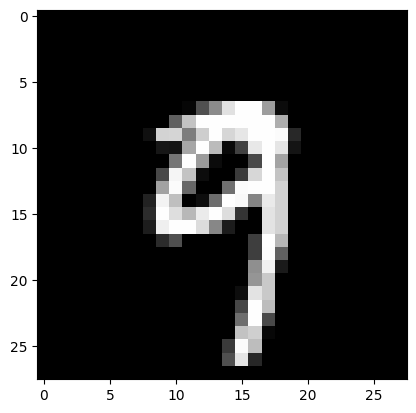

Label: 9


In [ ]:
train_features,train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img,cmap='gray')
plt.show()
print(f"Label: {label}")

In [ ]:
from torch import nn

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork()

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [ ]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  # Set the model to training mode - important for batch normalization and dropout layers
  # Unnecessary in this situation but added for best practices
  model.train()
  for batch, (X, y) in enumerate(dataloader):
    # Compute prediction and loss
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      loss, current = loss.item(), (batch + 1) * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
  # Set the model to evaluation mode - important for batch normalization and dropout layers
  # Unnecessary in this situation but added for best practices
  model.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
  # Also serves to reduce unnecessary gradient computations and memory usage for tensors
  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test error : \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

def val_loop(dataloader, model, loss_fn):
  # Set the model to evaluation mode - important for batch normalization and dropout layers
  # Unnecessary in this situation but added for best practices
  model.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
  # Also serves to reduce unnecessary gradient computations and memory usage for tensors
  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Validation error : \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 20
for t in range(epochs):
  print(f"Epoch {t+1}\n------------------------------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  val_loop(val_dataloader, model, loss_fn)
  test_loop(test_dataloader, model, loss_fn)

Epoch 1
------------------------------------------
loss: 2.304466 [   64/60000]
loss: 2.300231 [ 6464/60000]
loss: 2.294884 [12864/60000]
loss: 2.286346 [19264/60000]
loss: 2.286783 [25664/60000]
loss: 2.280002 [32064/60000]
loss: 2.271542 [38464/60000]
loss: 2.266351 [44864/60000]
loss: 2.276125 [51264/60000]
loss: 2.270389 [57664/60000]
Validation error : 
 Accuracy: 49.5%, Avg loss: 2.262115 

Test error : 
 Accuracy: 51.0%, Avg loss: 2.260840 

Epoch 2
------------------------------------------
loss: 2.268809 [   64/60000]
loss: 2.255421 [ 6464/60000]
loss: 2.252072 [12864/60000]
loss: 2.249449 [19264/60000]
loss: 2.239784 [25664/60000]
loss: 2.236688 [32064/60000]
loss: 2.230093 [38464/60000]
loss: 2.210936 [44864/60000]
loss: 2.215844 [51264/60000]
loss: 2.216633 [57664/60000]
Validation error : 
 Accuracy: 63.2%, Avg loss: 2.203293 

Test error : 
 Accuracy: 63.5%, Avg loss: 2.200460 

Epoch 3
------------------------------------------
loss: 2.209453 [   64/60000]
loss: 2.205516